# Определение перспективного тарифа для телеком-компании

<b>Задача исследования</b> - проведение предварительного анализа тарифов на небольшой выборке клиентов.<br> 
Используются <b>данные 500 пользователей</b> «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. <br>
<b>Цель</b> анализа поведения клиентов — выяснить, какой тариф выгоднее для компании.

<b>Тарифы:</b><br>
- Смарт - 550 руб./мес.: 500 мин., 50 сообщ., 15 гб. трафика. Сверх этого: 3 руб./мин., 3 руб./сообщ., 200 руб./гб.
- Ультра - 1 950 руб./мес.: 3 000 мин., 1 000 сообщ., 30 гб. трафика. Сверх этого: 1 руб./мин., 1 руб./сообщ., 150 руб./гб.

<b>Данные:</b><br>
- Информация о клиентах
- Информация о звонках обозначенных клиентов за 2018 год
- Информация об отправленных сообщениях обозначенных клиентов за 2018 год
- Информация о израсходованном интернет-трафике обозначенных клиентов за 2018 год

<b>План исследования:</b><br>
- Подготовка данных (очистка, исправление ошибок, группировка по месяцам)
- Рассчет среднемесячных показателей для каждого клиента по совокупной продолжительности звонков, количеству отправленных сообщений и объему потребленного интернет-трафика.
- Проверка гипотез о разнице выручки оператора от разных тарифов и межрегиональной разнице в выручке.

<a id="title"></a>

<b>Оглавление:</b>
1. [Открытие и первичный анализ данных](#start)
2. [Предобработка данных](#first_steps)
    * [Замена типов данных](#types)
    * [Обработка ошибок](#mistakes)
    * [Добавление новых столбцов](#new_columns)
    * [Промежуточный вывод](#first_conclusion)
3. [Анализ данных](#second_step)
    * [Промежуточный вывод](#second_conclusion)
4. [Проверка гипотез](#third_step)
    * [Разница между тарифами](#tarifs)
    * [Разница между регионами](#regions)
5. [Итоговый вывод](#final_step)

<a id="start"></a>

## Открытие и первичный анализ данных 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
sns.set(rc={'figure.figsize':(12,9)})
pd.set_option('display.precision', 3)
pd.options.display.max_colwidth = 1

Подгружаем библиотеки

In [3]:
#Информация о звонках
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
#Информация об интернет-сессиях
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
#Информация о соощениях
msg = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
#Информация о тарифах
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
#Информация о пользователях
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

Подгружаем массивы

In [4]:
def fast_review(df):
    print ('Общий вид данных')
    display(df.sample(10, random_state = 0))
    print ('-------------------------')
    print ('Общая информация о данных')
    df.info()
    print ('-------------------------')
    print ('Количество дубликатов: {}'.format(df.duplicated().sum()))

In [5]:
fast_review(calls)

Общий вид данных


,id,call_date,duration,user_id
40510,1100_33,2018-09-23,0.00,1100
150407,1377_1254,2018-04-03,12.26,1377
48714,1121_371,2018-12-27,11.24,1121
103039,1264_178,2018-10-22,4.46,1264
52767,1133_32,2018-12-08,6.41,1133
131357,1337_146,2018-06-26,3.30,1337
67046,1171_71,2018-09-28,14.44,1171
69132,1174_172,2018-07-29,7.93,1174
17461,1048_251,2018-12-27,8.21,1048
83622,1208_474,2018-05-04,6.47,1208


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
-------------------------
Количество дубликатов: 0


In [6]:
fast_review(msg)

Общий вид данных


,id,message_date,user_id
94381,1385_1090,2018-05-03,1385
109956,1443_55,2018-12-02,1443
75655,1320_9,2018-09-19,1320
118304,1481_75,2018-10-06,1481
91567,1379_253,2018-09-02,1379
85017,1356_34,2018-07-08,1356
97880,1401_212,2018-04-20,1401
67144,1285_332,2018-06-10,1285
60737,1268_52,2018-09-22,1268
33081,1145_734,2018-12-27,1145


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-------------------------
Количество дубликатов: 0


In [7]:
fast_review(internet)

Общий вид данных


,Unnamed: 0,id,mb_used,session_date,user_id
26617,26617,1092_283,828.84,2018-08-02,1092
112390,112390,1380_519,912.76,2018-07-20,1380
99054,99054,1332_28,0.00,2018-06-28,1332
86235,86235,1292_351,451.91,2018-09-24,1292
6819,6819,1023_55,161.65,2018-12-19,1023
41366,41366,1145_102,277.28,2018-05-25,1145
49486,49486,1171_188,360.05,2018-09-21,1171
38558,38558,1135_38,0.00,2018-11-12,1135
135048,135048,1453_269,1087.96,2018-11-29,1453
140663,140663,1472_337,336.81,2018-01-22,1472


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
-------------------------
Количество дубликатов: 0


In [8]:
fast_review(users)

Общий вид данных


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra
254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra
283,1283,50,NaN,Москва,Юлий,Крючков,2018-09-07,smart
445,1445,40,NaN,Москва,Рауль,Иванов,2018-12-29,smart
461,1461,53,NaN,Москва,Ангелина,Фетисова,2018-11-21,ultra
15,1015,26,NaN,Челябинск,Рузана,Алюшина,2018-04-30,smart
316,1316,42,NaN,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart
489,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
159,1159,64,NaN,Красноярск,Эльга,Аничкина,2018-11-28,smart
153,1153,59,NaN,Ульяновск,Евдокия,Одинцова,2018-10-18,smart


-------------------------
Общая информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
-------------------------
Количество дубликатов: 0


In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Сразу очевидны следующие проблемы:
- Переменные с датами имеют тип данных object 
- Ряд переменных, например, тариф необходимо перевести в категориальный тип
- В данных по интернет-сессиям есть лишний столбец unnamed

[Вернуться к оглавлению](#title)

<a id="first_steps"></a>

## Предобработка данных 

В данном разделе мы начнем с замены типов данных для ряда столбцов, после изучим массивы на момент наличия пропусков, дубликатов и прочих ошибок в данных.   

[Вернуться к оглавлению](#title)

In [10]:
def miss_table(data):
    missings = pd.DataFrame(data.isna().mean()*100, columns = ['% miss'])
    missings['# miss'] = pd.DataFrame(data.isna().sum())
    display (missings.style.background_gradient('coolwarm'))

In [11]:
def des_var(data):
    for i in list(data):
        if (data[i].dtypes!='object') and (data[i].nunique() > 10):
             display (data[i].describe())
        else: 
            display (data[i].value_counts())
        print ('------------------------------')
        print (' ')

In [12]:
def united_description(df):
    print ('Общая информация о массиве')
    df.info()
    print ('-----------------------------')
    print ('Наличие пропусков в данных')
    miss_table(df)
    print ('-----------------------------')
    print ('Общее описание переменных')
    des_var(df)
    print ('-----------------------------')
    print ('Количество дубликатов: {}'.format(df.duplicated().sum()))

<a id="types"></a>

### Замена типов данных 

In [13]:
united_description(calls)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
id,0.000000,0
call_date,0.000000,0
duration,0.000000,0
user_id,0.000000,0


-----------------------------
Общее описание переменных


1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

------------------------------
 


2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05    20  
2018-01-07    18  
2018-01-02    9   
2018-01-03    7   
2018-01-01    5   
Name: call_date, Length: 365, dtype: int64

------------------------------
 


count    202607.000
mean     6.756     
std      5.843     
min      0.000     
25%      1.300     
50%      6.000     
75%      10.700    
max      38.000    
Name: duration, dtype: float64

------------------------------
 


count    202607.000
mean     1253.941  
std      144.723   
min      1000.000  
25%      1126.000  
50%      1260.000  
75%      1379.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 
-----------------------------
Количество дубликатов: 0


Замена требуется переменной call_date

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')

In [15]:
united_description(internet)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
Unnamed: 0,0.000000,0
id,0.000000,0
mb_used,0.000000,0
session_date,0.000000,0
user_id,0.000000,0


-----------------------------
Общее описание переменных


count    149396.000
mean     74697.500 
std      43127.055 
min      0.000     
25%      37348.750 
50%      74697.500 
75%      112046.250
max      149395.000
Name: Unnamed: 0, dtype: float64

------------------------------
 


1000_0      1
1333_109    1
1334_0      1
1334_1      1
1334_2      1
           ..
1172_80     1
1172_81     1
1172_82     1
1172_83     1
1499_156    1
Name: id, Length: 149396, dtype: int64

------------------------------
 


count    149396.000
mean     370.192   
std      278.301   
min      0.000     
25%      138.188   
50%      348.015   
75%      559.553   
max      1724.830  
Name: mb_used, dtype: float64

------------------------------
 


2018-12-31    1057
2018-12-30    903 
2018-12-25    859 
2018-12-26    844 
2018-12-22    834 
             ...  
2018-01-05    14  
2018-01-04    9   
2018-01-03    6   
2018-01-02    3   
2018-01-01    3   
Name: session_date, Length: 365, dtype: int64

------------------------------
 


count    149396.000
mean     1252.100  
std      144.051   
min      1000.000  
25%      1130.000  
50%      1251.000  
75%      1380.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 
-----------------------------
Количество дубликатов: 0


Замена требуется переменной session_date, а также необходимо удалить столбец Unnamed, который, видимо, представляет собой продублированную индексацию строк.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')

In [17]:
internet = internet.drop('Unnamed: 0', axis=1)

In [18]:
united_description(msg)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
id,0.000000,0
message_date,0.000000,0
user_id,0.000000,0


-----------------------------
Общее описание переменных


1000_0      1
1344_248    1
1344_96     1
1344_95     1
1344_94     1
           ..
1174_352    1
1174_351    1
1174_350    1
1174_349    1
1499_183    1
Name: id, Length: 123036, dtype: int64

------------------------------
 


2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-11    12 
2018-01-05    10 
2018-01-04    10 
2018-01-02    10 
2018-01-03    4  
Name: message_date, Length: 364, dtype: int64

------------------------------
 


count    123036.000
mean     1256.989  
std      143.524   
min      1000.000  
25%      1134.000  
50%      1271.000  
75%      1381.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 
-----------------------------
Количество дубликатов: 0


Замена требуется переменной message_date

In [19]:
msg['message_date'] = pd.to_datetime(msg['message_date'], format = '%Y-%m-%dT%H:%M:%S')

Замена проведена успешно

Датафрейму tarifs де-факто никакие правки не нужны, так как он просто представляет собой информацию о двух тарифах, целиком состоящую из целочисленных значений

In [20]:
united_description(users)

Общая информация о массиве
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
-----------------------------
Наличие пропусков в данных


,% miss,# miss
user_id,0.000000,0
age,0.000000,0
churn_date,92.400000,462
city,0.000000,0
first_name,0.000000,0
last_name,0.000000,0
reg_date,0.000000,0
tariff,0.000000,0


-----------------------------
Общее описание переменных


count    500.000 
mean     1249.500
std      144.482 
min      1000.000
25%      1124.750
50%      1249.500
75%      1374.250
max      1499.000
Name: user_id, dtype: float64

------------------------------
 


count    500.000
mean     46.588 
std      16.668 
min      18.000 
25%      32.000 
50%      46.000 
75%      62.000 
max      75.000 
Name: age, dtype: float64

------------------------------
 


2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-09    2
2018-12-21    2
2018-12-30    1
2018-10-28    1
2018-11-26    1
2018-11-27    1
2018-11-16    1
2018-10-27    1
2018-10-05    1
2018-09-27    1
2018-11-13    1
2018-12-25    1
2018-12-14    1
2018-12-24    1
2018-09-26    1
2018-11-22    1
2018-08-17    1
2018-10-04    1
2018-09-02    1
2018-12-18    1
2018-11-30    1
2018-12-20    1
2018-12-16    1
2018-11-07    1
2018-12-23    1
2018-08-31    1
2018-12-26    1
2018-12-11    1
2018-11-21    1
2018-10-25    1
Name: churn_date, dtype: int64

------------------------------
 


Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск        1 
Иваново            1 
Нижневартовск      1 
Химки              1 
Подольск           1 
Name: city, Length: 76, dtype: int64

------------------------------
 


Радим      6
Леонид     5
Пётр       5
Андрей     4
Адам       4
          ..
Зинаида    1
Глеб       1
Роза       1
Юзефа      1
Трифон     1
Name: first_name, Length: 246, dtype: int64

------------------------------
 


Андреенко     5
Березина      3
Аркадьев      3
Булгаков      3
Соловьев      3
             ..
Медведев      1
Минаева       1
Авдонюшкин    1
Андрейчук     1
Акимчин       1
Name: last_name, Length: 419, dtype: int64

------------------------------
 


2018-05-28    8
2018-11-16    5
2018-10-05    5
2018-04-03    5
2018-01-04    5
             ..
2018-09-20    1
2018-04-28    1
2018-08-07    1
2018-06-18    1
2018-04-25    1
Name: reg_date, Length: 270, dtype: int64

------------------------------
 


smart    351
ultra    149
Name: tariff, dtype: int64

------------------------------
 
-----------------------------
Количество дубликатов: 0


Замена требуется переменным reg_date и churn_date на тип datetime, а переменной tariff на категориальный тип.

In [21]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')

In [22]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%dT%H:%M:%S')

In [23]:
users['tariff'] = users['tariff'].astype('category')

Замены проведены успешно

[Вернуться к оглавлению](#title)

<a id="mistakes"></a>

### Обработка ошибок

Из анализа данных, проведенного выше, видим, что пропуски есть только в переменной churn_date массива users, где они должны быть. Поэтому заполнением/удалением пропусков в данном случае заниматься не требуется.

Полные дубликаты в данных у нас также отсутствуют, что в целом логично, так как массив с пользователями у нас специально отобран, а остальные массивы представляют из себя логи с уникальными id. 

Очевидные ошибки в данных отсутствуют, поэтому начинаем искать неочевидные.

In [24]:
des_var(calls)

1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     202607             
unique    365                
top       2018-12-31 00:00:00
freq      1435               
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

------------------------------
 


count    202607.000
mean     6.756     
std      5.843     
min      0.000     
25%      1.300     
50%      6.000     
75%      10.700    
max      38.000    
Name: duration, dtype: float64

------------------------------
 


count    202607.000
mean     1253.941  
std      144.723   
min      1000.000  
25%      1126.000  
50%      1260.000  
75%      1379.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 


Все данные по звонкам в пределах исследуемого 2018 года, аномально длинных звонков нет, максимальный - 38 минут, что даже как-то мало. Звонки с нулевой продолжительностью, как было указано в документации к данным, ошибкой не являются, так как обозначают собой пропущенные звонки.

In [25]:
des_var(internet)

1000_0      1
1333_109    1
1334_0      1
1334_1      1
1334_2      1
           ..
1172_80     1
1172_81     1
1172_82     1
1172_83     1
1499_156    1
Name: id, Length: 149396, dtype: int64

------------------------------
 


count    149396.000
mean     370.192   
std      278.301   
min      0.000     
25%      138.188   
50%      348.015   
75%      559.553   
max      1724.830  
Name: mb_used, dtype: float64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     149396             
unique    365                
top       2018-12-31 00:00:00
freq      1057               
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

------------------------------
 


count    149396.000
mean     1252.100  
std      144.051   
min      1000.000  
25%      1130.000  
50%      1251.000  
75%      1380.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 


Все интернет-сессии находятся в пределах исследуемого промежутка. Касательно объемов потребляемого трафика ситуация сложнее, максимальные значения выглядят разумными, а вот с минимальными не ясно, так как в документации не было указано, что возможны интернет сессии по 0 мгбт. 

In [26]:
internet[internet['mb_used'] == 0].count()

id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

Таковых почти 20 тыс сессий, то есть более 10% от общего объема датафрейма. 

In [27]:
des_var(internet[internet['mb_used'] == 0])

1000_11     1
1323_249    1
1323_285    1
1323_275    1
1323_271    1
           ..
1161_144    1
1161_142    1
1161_140    1
1161_139    1
1499_154    1
Name: id, Length: 19598, dtype: int64

------------------------------
 


0.0    19598
Name: mb_used, dtype: int64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     19598              
unique    364                
top       2018-12-31 00:00:00
freq      141                
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

------------------------------
 


count    19598.000
mean     1245.831 
std      145.663  
min      1000.000 
25%      1121.000 
50%      1241.000 
75%      1374.000 
max      1499.000 
Name: user_id, dtype: float64

------------------------------
 


In [28]:
internet[internet['mb_used'] == 0]['user_id'].nunique()

494

In [29]:
internet[internet['mb_used'] == 0]['session_date'].nunique()

364

Эти нулевые сессии происходили на протяжении всего года, у разных пользователей, то есть мы не можем сказать, что это ошибки связанные с какой-то конкретной датой или клиентом. 

Так как нас не интересует общее количество сессий и т.п. для общей чистоты картины и экономии потребляемой памяти было принято решение удалить строки с нулевым потреблением трафика. 

In [30]:
internet = internet.drop(internet[internet['mb_used'] == 0].index)

In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ MB


Строки успешно удалены, но памяти df почему-то стал занимать даже больше, хотя все равно немного.

In [32]:
des_var(msg)

1000_0      1
1344_248    1
1344_96     1
1344_95     1
1344_94     1
           ..
1174_352    1
1174_351    1
1174_350    1
1174_349    1
1499_183    1
Name: id, Length: 123036, dtype: int64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     123036             
unique    364                
top       2018-12-31 00:00:00
freq      859                
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

------------------------------
 


count    123036.000
mean     1256.989  
std      143.524   
min      1000.000  
25%      1134.000  
50%      1271.000  
75%      1381.000  
max      1499.000  
Name: user_id, dtype: float64

------------------------------
 


Все сообщения укладываются во временные рамки исследования.

In [33]:
des_var(users)

count    500.000 
mean     1249.500
std      144.482 
min      1000.000
25%      1124.750
50%      1249.500
75%      1374.250
max      1499.000
Name: user_id, dtype: float64

------------------------------
 


count    500.000
mean     46.588 
std      16.668 
min      18.000 
25%      32.000 
50%      46.000 
75%      62.000 
max      75.000 
Name: age, dtype: float64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     38                 
unique    33                 
top       2018-12-03 00:00:00
freq      2                  
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object

------------------------------
 


Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск        1 
Иваново            1 
Нижневартовск      1 
Химки              1 
Подольск           1 
Name: city, Length: 76, dtype: int64

------------------------------
 


Радим      6
Леонид     5
Пётр       5
Андрей     4
Адам       4
          ..
Зинаида    1
Глеб       1
Роза       1
Юзефа      1
Трифон     1
Name: first_name, Length: 246, dtype: int64

------------------------------
 


Андреенко     5
Березина      3
Аркадьев      3
Булгаков      3
Соловьев      3
             ..
Медведев      1
Минаева       1
Авдонюшкин    1
Андрейчук     1
Акимчин       1
Name: last_name, Length: 419, dtype: int64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\2421465954.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     500                
unique    270                
top       2018-05-28 00:00:00
freq      8                  
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

------------------------------
 


smart    351
ultra    149
Name: tariff, dtype: int64

------------------------------
 


- Возраст клиентов находится в разумных рамках от 18 и до 75. 
- Имя "Радим", как выяснилось, реально существует и это не опечатка в "Вадим"
- С городами и фамилиями все в порядке, наверху ранжированного списка миллионники, что логично и репрезентативно.
- Вопросы вызывается максимальная дата регистрации - 31 декабря: во-первых, кто регистрирует сим-карту в Новый год, а, во-вторых, не внесут ли поздние регистрации нежелательные отклонения в результаты.

In [34]:
display(users[users['reg_date'] > '2018-12'].sort_values(by = 'reg_date', ascending = False))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
336,1336,27,NaT,Уфа,Авксентий,Алексеичев,2018-12-31,ultra
258,1258,52,NaT,Санкт-Петербург,Валерий,Беляев,2018-12-31,smart
140,1140,22,NaT,Киров,Леонид,Ахматулин,2018-12-31,smart
74,1074,68,NaT,Якутск,Андрей,Кравцов,2018-12-30,smart
485,1485,34,NaT,Киров,Таисия,Сухова,2018-12-29,ultra
445,1445,40,NaT,Москва,Рауль,Иванов,2018-12-29,smart
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
95,1095,70,NaT,Новосибирск,Марианна,Кабанова,2018-12-23,smart
278,1278,46,NaT,Новокузнецк,Леонид,Троицкий,2018-12-23,smart
397,1397,47,NaT,Воронеж,Инна,Чистякова,2018-12-22,ultra


При внимательном анализе были найдены две категории клиентов в выборке, у которых не будет и одного полноценного месяца пользования услугами оператора:
- Те кто зарегистрировался уже в декабре 2018;
- Те, кто отказался от услуг оператора менее чем через месяц после даты регистрации.

Будем иметь их в виду на всяких случай.

In [35]:
calls['duration'] = np.ceil(calls['duration'])

Округляем продолжительность звонков вверх в соответствии с правилами тарифа

In [36]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Выделяем календарный месяц для группировки

In [37]:
calls_by_month = calls.pivot_table(index = ['user_id', 'month'], values = ['id', 'duration'], aggfunc = {'id': 'count', 'duration': 'sum'})

In [38]:
calls_by_month = calls_by_month.reset_index(level=0)

In [39]:
calls_by_month = calls_by_month.reset_index(level=0)

In [40]:
calls_by_month.rename(columns = {'id':'calls_count'}, inplace = True)

Переводим индексы в нормальные столбцы и повторяем процедуру c некоторыми корректировками с интернетом и сообщениями 

In [41]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [42]:
internet_by_month = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [43]:
internet_by_month = internet_by_month.reset_index(level=0)

In [44]:
internet_by_month = internet_by_month.reset_index(level=0)

In [45]:
internet_by_month['mb_used'] = (internet_by_month['mb_used']/1024).apply(np.ceil)

Также переводим в гб и округляем наверх в соответствие с правилами тарифа

In [46]:
msg

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [47]:
msg['month'] = pd.DatetimeIndex(msg['message_date']).month

In [48]:
msg_by_month = msg.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

In [49]:
msg_by_month.rename(columns = {'id':'msg_count'}, inplace = True)

In [50]:
msg_by_month = msg_by_month.reset_index(level=0)

In [51]:
msg_by_month = msg_by_month.reset_index(level=0)

Среднемесячные значения для каждого массива по клиентам рассчитаны, теперь необходимо объединить с таблицей пользователей и тарифов

In [52]:
revenue = calls_by_month.merge(internet_by_month, on = ['user_id', 'month'], how = 'outer')
revenue = revenue.merge(msg_by_month, on = ['user_id', 'month'], how = 'outer')
revenue = revenue.merge(users[['user_id', 'city', 'tariff']], on = ['user_id'], how = 'outer')

In [53]:
revenue.rename(columns = {'tariff':'tariff_name'}, inplace = True)

In [54]:
revenue = revenue.merge(tariffs, on = ['tariff_name'], how = 'outer')

In [55]:
revenue['mb_per_month_included'] = revenue['mb_per_month_included']/1024
revenue.rename(columns = {'mb_per_month_included':'gb_per_month_included'}, inplace = True)

In [56]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,NaN,NaN,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3212,10.0,1489,NaN,NaN,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3213,11.0,1489,NaN,NaN,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3214,12.0,1489,NaN,NaN,17.0,35.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3


Объединения завершены, но в полученной таблице мы видим пропуски, необходимо их проанализировать

In [57]:
miss_table(revenue)

,% miss,# miss
month,0.062189,2
user_id,0.000000,0
duration,1.305970,42
calls_count,1.305970,42
mb_used,0.466418,15
msg_count,15.516169,499
city,0.000000,0
tariff_name,0.000000,0
messages_included,0.000000,0
gb_per_month_included,0.000000,0


В случае с пропусками в звонках, интернете и особенно в сообщениях (которыми скорее всего многие давно не пользуются), мы понимаем что в каком-то месяце пользователю просто не требовалась данная услуга и мы можем заполнить пропуск нулем. В случае же с месяцами все несколько интереснее.

In [58]:
revenue[revenue['month'] != revenue['month']]

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,NaN,1128,NaN,NaN,NaN,NaN,Волжский,ultra,1000,30.0,3000,1950,150,1,1
3215,NaN,1371,NaN,NaN,NaN,NaN,Омск,smart,50,15.0,500,550,200,3,3


Мы находим, что это два пользователя, необходимо посмотреть внимательнее

In [59]:
users[users['user_id'] == 1128]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [60]:
users[users['user_id'] == 1371]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Находим этих двух пользователей и понимаем, что они отключили тариф буквально через несколько дней после регистрации. По нашему вышеобозначенному допущению мы по идее должны насчитать им абонентскую плату за месяц, но так как их немного, можем просто удалить из таблицы.

In [61]:
revenue = revenue.drop(revenue[revenue['user_id'] == 1128].index)
revenue = revenue.drop(revenue[revenue['user_id'] == 1371].index)

In [62]:
revenue = revenue.fillna(0)

Остальные пропуски заполняем нулями

In [63]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,8.0,1489,0.0,0.0,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3211,9.0,1489,0.0,0.0,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3212,10.0,1489,0.0,0.0,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3
3213,11.0,1489,0.0,0.0,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3


In [64]:
miss_table(revenue)

,% miss,# miss
month,0.000000,0
user_id,0.000000,0
duration,0.000000,0
calls_count,0.000000,0
mb_used,0.000000,0
msg_count,0.000000,0
city,0.000000,0
tariff_name,0.000000,0
messages_included,0.000000,0
gb_per_month_included,0.000000,0


<b>ИТОГО</b>

- Все ошибки в данных устранены, можно переходить к рассчету выручки

[Вернуться к оглавлению](#title)

<a id="new_columns"></a>

### Расчеты

In [65]:
revenue[['calls_payment', 'internet_payment', 'msg_payment']] = revenue[['duration', 'mb_used', 'msg_count']]

Создаем специальные столбцы

In [66]:
revenue['calls_payment'] = revenue['calls_payment'] - revenue['minutes_included']

Убираем включенные в тариф, чтобы понять, сколько было уплачено сверх.

Далее для звонков, сообщений и интернета умножаем на стоимость по тарифу.

In [67]:
revenue['calls_payment'][revenue['calls_payment'] > 0] = revenue['calls_payment'][revenue['calls_payment'] > 0]*revenue['rub_per_minute']
revenue['calls_payment'][revenue['calls_payment'] <= 0] = revenue['calls_payment'][revenue['calls_payment'] <= 0]*0

C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\4042306568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['calls_payment'][revenue['calls_payment'] > 0] = revenue['calls_payment'][revenue['calls_payment'] > 0]*revenue['rub_per_minute']
C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\4042306568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['calls_payment'][revenue['calls_payment'] <= 0] = revenue['calls_payment'][revenue['calls_payment'] <= 0]*0


In [68]:
revenue['internet_payment'] = revenue['internet_payment'] - revenue['gb_per_month_included']
revenue['internet_payment'][revenue['internet_payment'] > 0] = revenue['internet_payment'][revenue['internet_payment'] > 0]*revenue['rub_per_gb']
revenue['internet_payment'][revenue['internet_payment'] <= 0] = revenue['internet_payment'][revenue['internet_payment'] <= 0]*0

C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\958154942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['internet_payment'][revenue['internet_payment'] > 0] = revenue['internet_payment'][revenue['internet_payment'] > 0]*revenue['rub_per_gb']
C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\958154942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['internet_payment'][revenue['internet_payment'] <= 0] = revenue['internet_payment'][revenue['internet_payment'] <= 0]*0


In [69]:
revenue['msg_payment'] = revenue['msg_payment'] - revenue['messages_included']
revenue['msg_payment'][revenue['msg_payment'] > 0] = revenue['msg_payment'][revenue['msg_payment'] > 0]*revenue['rub_per_message']
revenue['msg_payment'][revenue['msg_payment'] <= 0] = revenue['msg_payment'][revenue['msg_payment'] <= 0]*0

C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\1115749147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['msg_payment'][revenue['msg_payment'] > 0] = revenue['msg_payment'][revenue['msg_payment'] > 0]*revenue['rub_per_message']
C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\1115749147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['msg_payment'][revenue['msg_payment'] <= 0] = revenue['msg_payment'][revenue['msg_payment'] <= 0]*0


Считаем полную стоимость уплаченного

In [70]:
revenue['total_revenue'] = revenue['rub_monthly_fee']
revenue['total_revenue'] = revenue['total_revenue'] + revenue['msg_payment'] + revenue['internet_payment'] + revenue['calls_payment']

In [71]:
revenue['msg_payment'][revenue['msg_payment'] == 0] = revenue['msg_payment'][revenue['msg_payment'] == 0] * -1
revenue['calls_payment'][revenue['calls_payment'] == 0] = revenue['calls_payment'][revenue['calls_payment'] == 0] * -1
revenue['internet_payment'][revenue['internet_payment'] == 0] = revenue['internet_payment'][revenue['internet_payment'] == 0] * -1

C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\4127233437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['msg_payment'][revenue['msg_payment'] == 0] = revenue['msg_payment'][revenue['msg_payment'] == 0] * -1
C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\4127233437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['calls_payment'][revenue['calls_payment'] == 0] = revenue['calls_payment'][revenue['calls_payment'] == 0] * -1
C:\Users\CaIII\AppData\Local\Temp\ipykernel_35408\4127233437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

Получаем финальную таблицу

In [72]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_payment,internet_payment,msg_payment,total_revenue
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,8.0,1489,0.0,0.0,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,9.0,1489,0.0,0.0,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,400.0,0.0,950.0
3212,10.0,1489,0.0,0.0,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,1000.0,0.0,1550.0
3213,11.0,1489,0.0,0.0,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0


Итак месячная выручка для каждого пользователя рассчитана.

[Вернуться к оглавлению](#title)

<a id="first_conclusion"></a>

### Промежуточный вывод

Проведены следующие работы по исправлению данных:
- Изменены типы данных в нескольки переменных
- Удален лишний столбец
- Удалены "нулевые" интернет-сессии
- Удалены данные о 2 клиентах, которые ушли со своего тарифа вскоре после регистрации, не успев воспользоваться услугами
- Заполнены нулями пропуски в тех случаях, когда клиент не пользовался какой-либо услугой в течении месяца.
- Произведены рассчеты для каждого клиентам по звонкам, сообщениям и интернет-сессиям, а также абонентской плате для каждого месяца использования.

[Вернуться к оглавлению](#title)

<a id="second_step"></a>

## Анализ данных

<a id="second_conclusion"></a>

In [73]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_payment,internet_payment,msg_payment,total_revenue
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,8.0,1489,0.0,0.0,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,9.0,1489,0.0,0.0,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,400.0,0.0,950.0
3212,10.0,1489,0.0,0.0,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,1000.0,0.0,1550.0
3213,11.0,1489,0.0,0.0,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0


In [74]:
revenue_pivot = revenue.pivot_table(index = 'month', values = 'total_revenue', columns = 'tariff_name', aggfunc = 'mean', margins = True)

revenue_pivot

tariff_name,smart,ultra,All
month,,,
1.0,721.324,1950.000,978.488
2.0,827.603,1975.000,1163.427
3.0,1164.623,2014.865,1440.579
4.0,963.089,2001.818,1305.186
5.0,1197.511,2059.701,1475.236
6.0,1204.018,2039.286,1486.931
7.0,1223.950,2118.132,1502.616
8.0,1320.596,2083.178,1559.181
9.0,1249.946,2024.348,1487.429


Мы построили сводную таблицу по среднемесячной выручке от каждого клиента с разбивкой по тарифом, которую далее визуализируем.

Text(0.5, 0, 'Месяц')

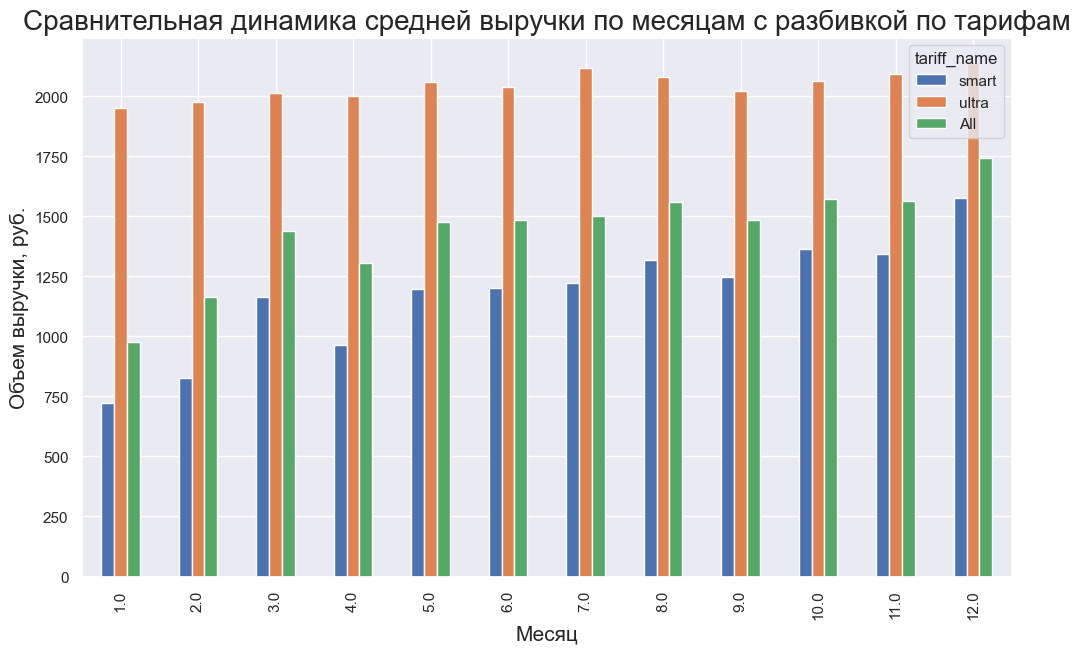

In [77]:
ax = revenue_pivot[0:12].plot.bar(figsize = (12, 7))
ax.set_title('Сравнительная динамика средней выручки по месяцам с разбивкой по тарифам', fontsize=20)
ax.set_ylabel('Объем выручки, руб.', fontsize=15)
ax.set_xlabel('Месяц', fontsize=15)

Text(0.5, 0, 'Тариф')

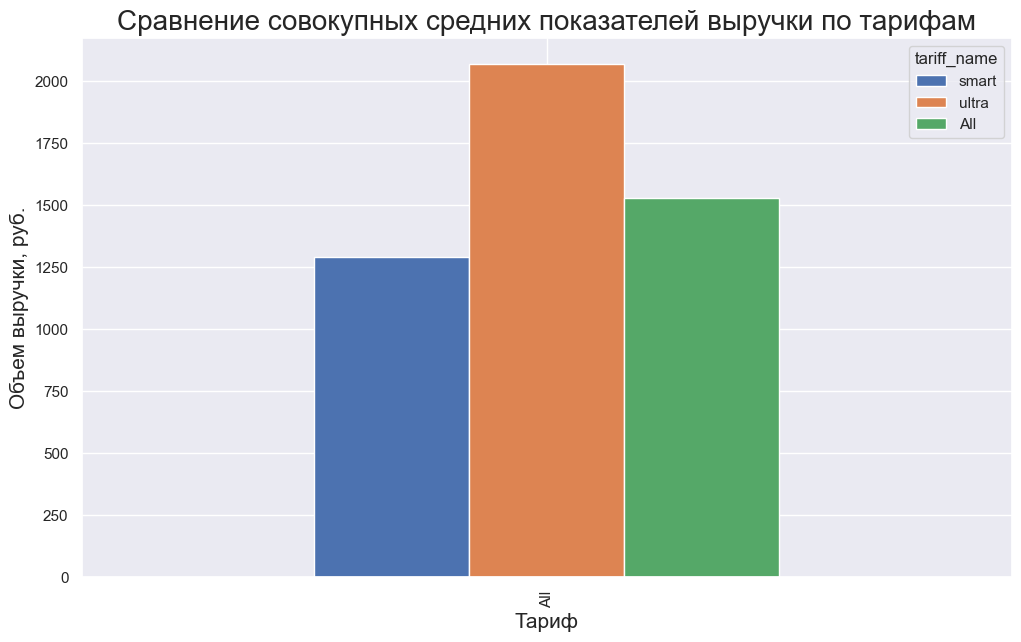

In [79]:
ax = revenue_pivot[revenue_pivot.index == 'All'].plot.bar(figsize = (12, 7))
ax.set_title('Сравнение совокупных средних показателей выручки по тарифам', fontsize=20)
ax.set_ylabel('Объем выручки, руб.', fontsize=15)
ax.set_xlabel('Тариф', fontsize=15)

Ожидаемо средняя выручка от более дорого тарифа выше, чем от более дешевого. Также важно отметить, что и пользователи тарифа "Смарт" тратят больше, чем входит в базовый пакет услуг. К тому же она более стабильна на протяжении времени - клиенты, пользующиеся тарифом "Смарт", постепенно начинают тратить больше - необходимо изучить причины.

In [80]:
def tariff_hist_2(df, i):
    
    sns.histplot(data=df, 
                 x=i, 
                 hue='tariff_name', 
                 stat='count', 
                 bins='auto', 
                 common_bins=True, 
                 common_norm=True,
                 multiple='layer', 
                 element='bars',
                 fill=True, 
                 shrink=1, 
                 thresh=0, 
                 pthresh=None, 
                 pmax=None, 
                 cbar=True, 
                 cbar_ax=None, 
                 cbar_kws=None, 
                 palette=None, 
                 hue_order=None, 
                 hue_norm=None, 
                 color=None,
                 legend=True, 
                 ax=None).set_title('Распределение ' + i + ' с разбивкой по тарифам')

In [81]:
def tariff_description(i):
    
    temp_df = revenue.pivot_table(index = ['user_id', 'tariff_name'], values = i, aggfunc = 'mean')

    temp_df = temp_df.reset_index(level=0)
    temp_df = temp_df.reset_index(level=0)
    
    df2 = pd.DataFrame(group.describe().rename(columns={i:name}).squeeze()
                             for name, group in temp_df[['tariff_name', i]].groupby('tariff_name'))

    print ('Описательные статистики  для ', i)
    display(df2)
    
    tariff_hist_2(temp_df, i)

In [82]:
def service_pivot (i):
    df_pivot = revenue.pivot_table(index = 'month', values = i, columns = 'tariff_name', aggfunc = 'mean', margins = True) 
    
    df_pivot[0:12].plot.bar(figsize = (12, 7)).set_title('Динамика ' + i + ' по месяцам' )
    
    df_pivot[df_pivot.index == 'All'].plot.bar(figsize = (12, 7)).set_title('Сравнение средних показателей  ' + i + ' за год')

In [83]:
revenue.columns

Index(['month', 'user_id', 'duration', 'calls_count', 'mb_used', 'msg_count',
       'city', 'tariff_name', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'calls_payment', 'internet_payment', 'msg_payment',
       'total_revenue'],
      dtype='object')

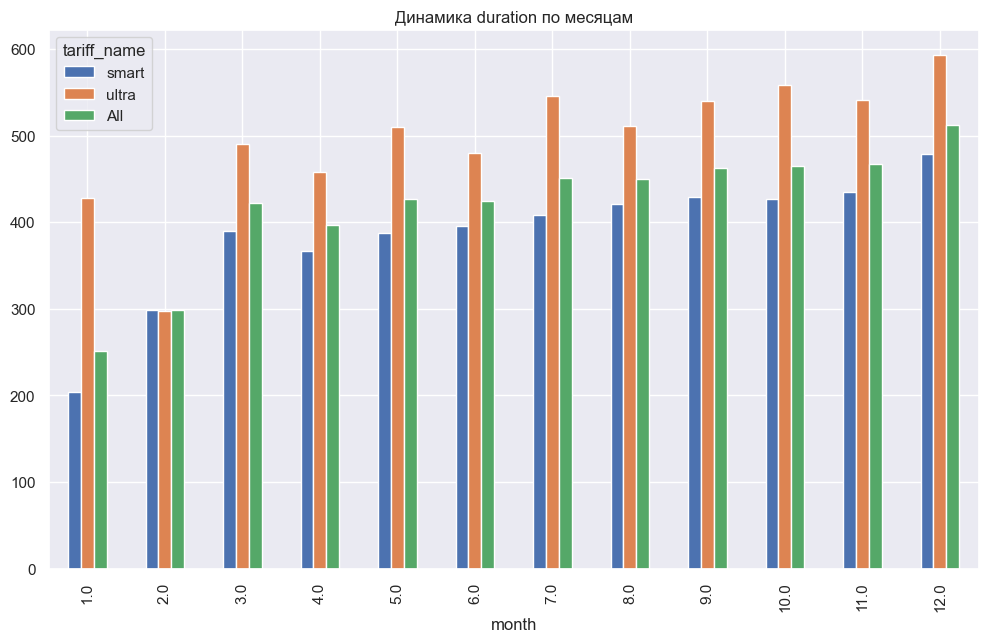

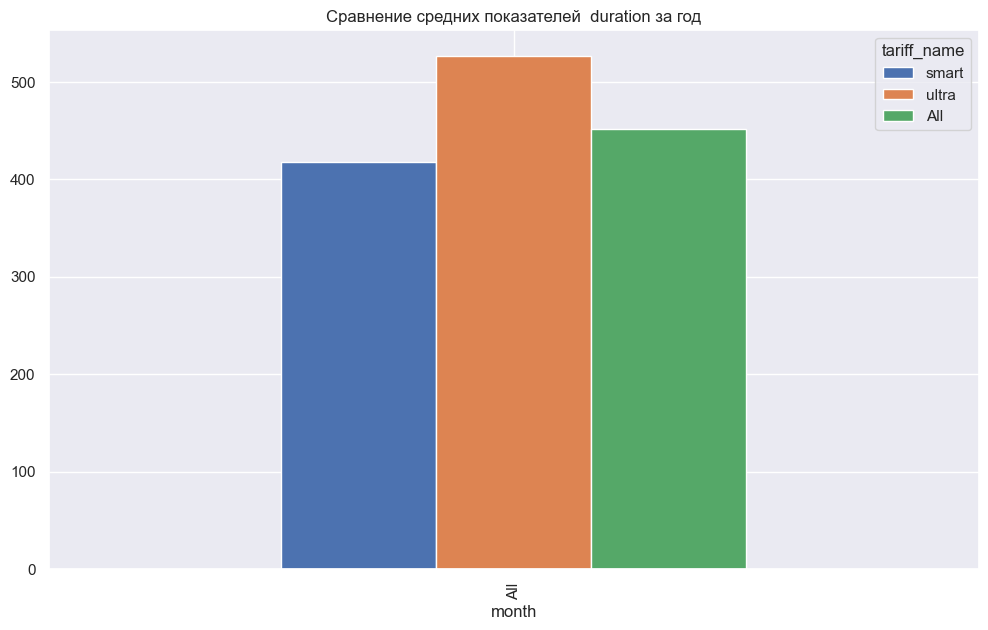

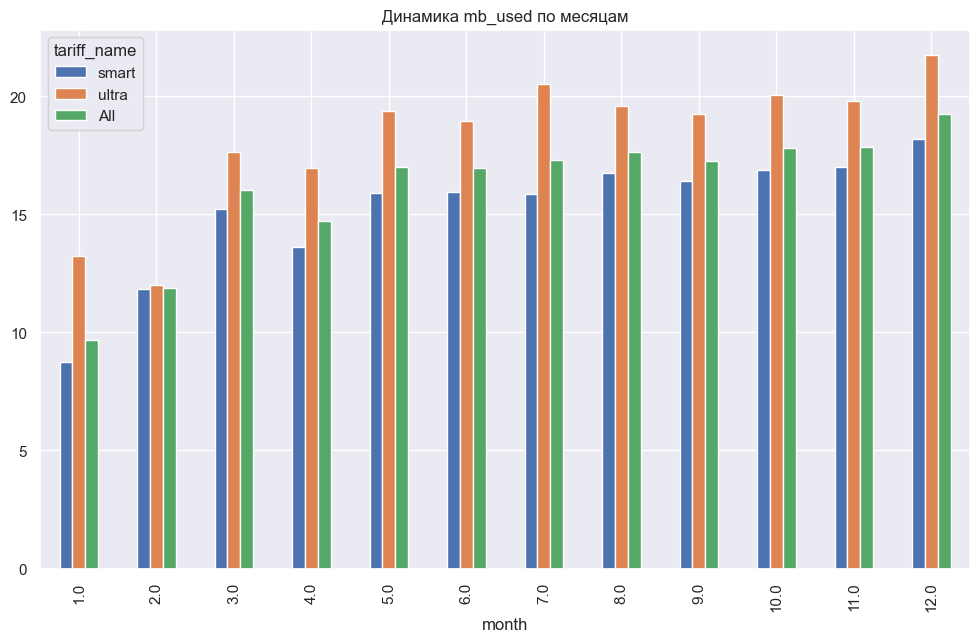

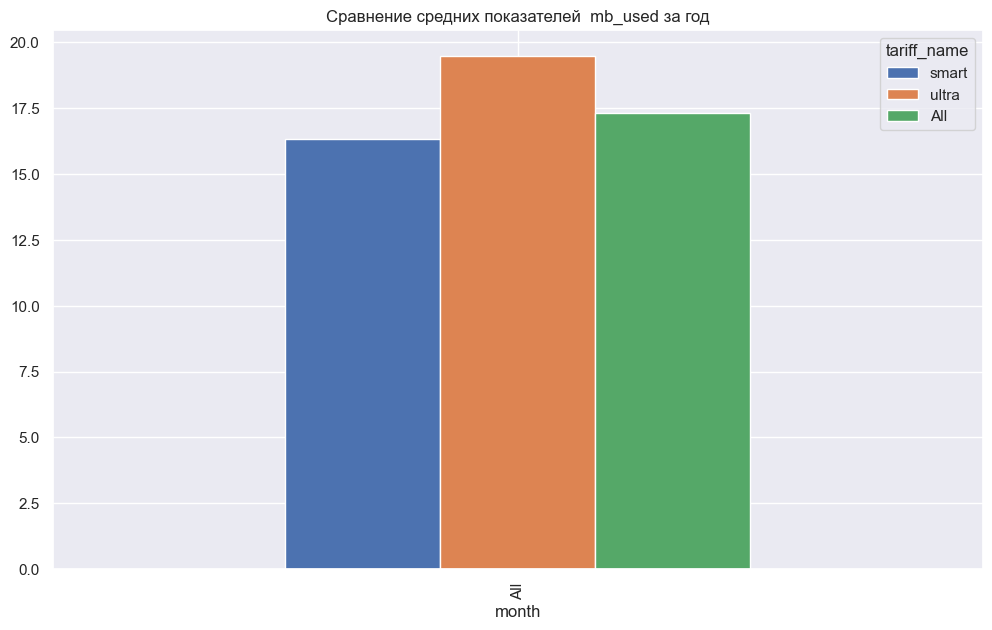

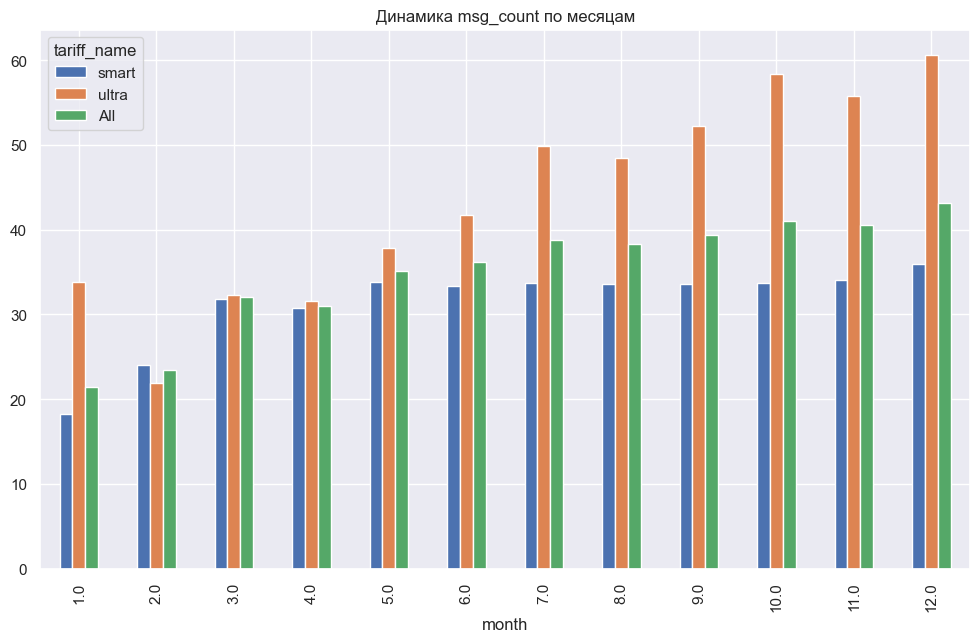

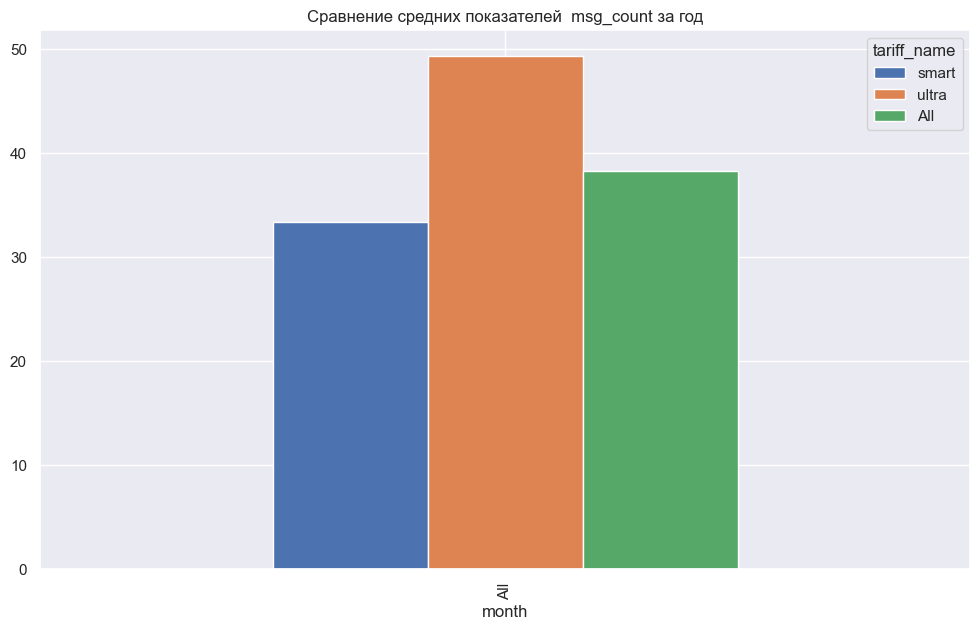

In [84]:
for col in ['duration', 'mb_used', 'msg_count']:
    service_pivot(col)

- Ожидаемо средние значения по всем параметрам для тарифа Ультра выше, чем у Смарта. Однако, удивительно то, что ненамного выше. Разница в лимитах и стоимости между тарифами в несколько раз, а в средних объемах пользования той или иной услугой - в примерно 20-30%.
- Касательно распределения по месяцам графики отражают проблему нашего базового допущения - из-за того, что в первые календарные месяцы еще набрана критическая масса тех, кто пользуется услугами "полный" месяц, средние значения ниже, с каждым месяцем они растут. Поэтому эти графики малоинформативны и в некоторой мере даже вредны. 

Описательные статистики  для  duration


,count,mean,std,min,25%,50%,75%,max
smart,350.0,419.635,145.032,0.0,316.886,425.062,519.508,891.500
ultra,148.0,527.822,281.786,0.0,325.438,514.542,746.972,1179.364


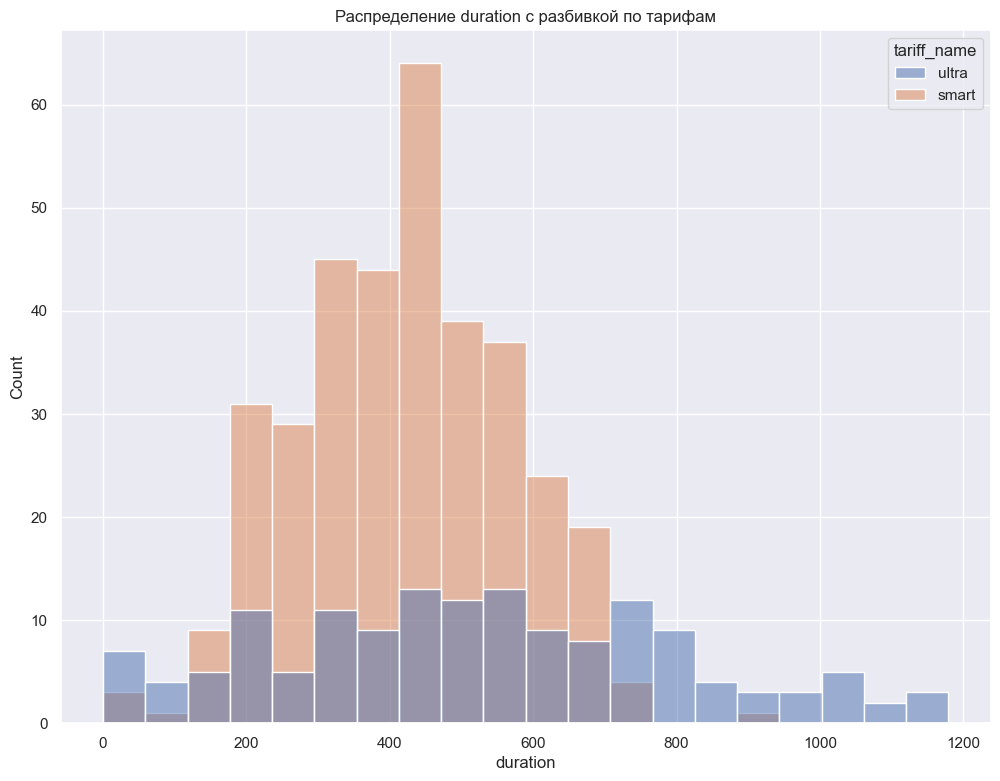

In [85]:
tariff_description('duration')

<b>По продолжительности звонков:</b>
- Средние значения у двух тарифов не очень сильно различаются
- У обоих тарифов средние значения находятся ниже порога, при этом у Ультры сильно ниже.
- Значительная доля пользователей Смарта наговаривает в месяц больше допустимого порога. У Ультры таких пользователей нет вообще.
- Распределение этого параметра у пользователей более пологое с большим стандартным отклонением, среди них есть те, кто разговаривают по-настоящему много.
- У Ультры сильно возрастает продолжительность разговор в 12 месяце, то есть в декабре, скорее всего это связано с новогодними праздниками, у пользователей Смарта такой аномалии нет.


Описательные статистики  для  mb_used


,count,mean,std,min,25%,50%,75%,max
smart,350.0,16.309,3.502,5.727,14.000,16.333,18.692,27.25
ultra,148.0,19.588,8.116,0.000,14.727,18.775,25.688,38.50


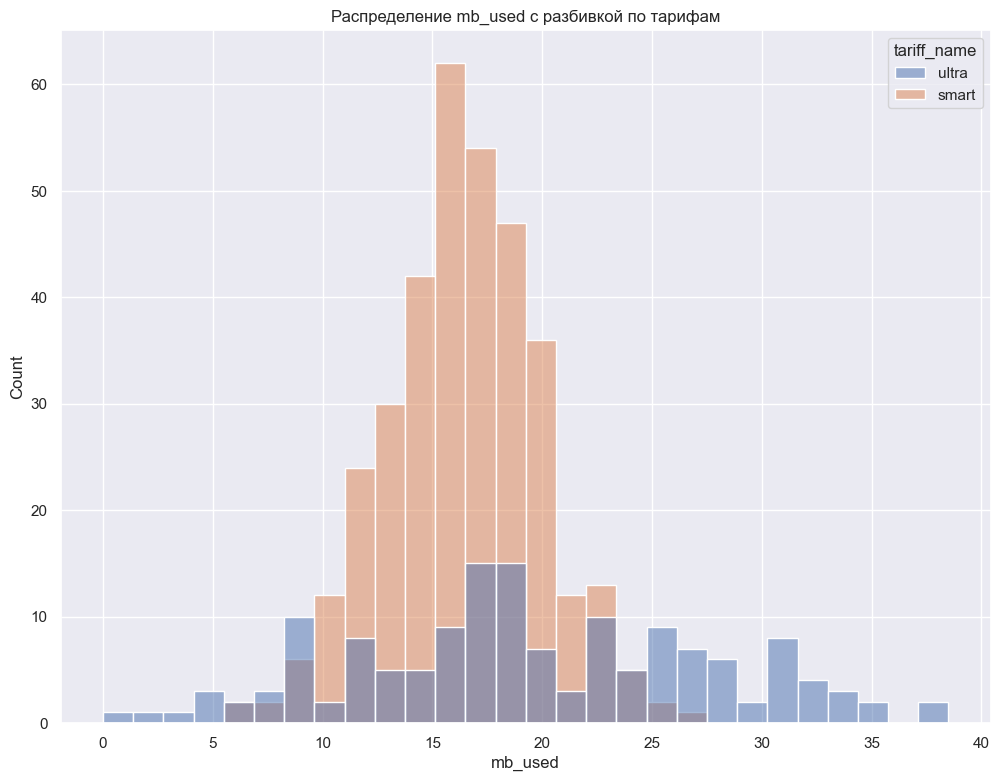

In [86]:
tariff_description('mb_used')

<b>По объемам потребляемого интернет-трафика:</b>
- Ситуация похожа на положение дел в продолжительности звонков.
- Объемы потребляемого трафика у обоих тарифов не сильно отличаются, но при этом если средний показатель Смарта - несколько выше объема, включенного в тариф, то пользователи Ультры тратят в среднем в районе 2/3 от положеного. 
- Более половины пользователей Смарта превышают положенную норму и доплачивают за гигабайты.
- Среди пользователей ультры таковых тоже много - в районе 20%.
- Распределение данного параметра у Ультры опять же более пологое, с большим стандартным отклонением. 

Описательные статистики  для  msg_count


,count,mean,std,min,25%,50%,75%,max
smart,350.0,32.352,26.512,0.0,11.0,27.75,48.00,118.0
ultra,148.0,54.031,46.366,0.0,17.0,45.50,84.25,192.0


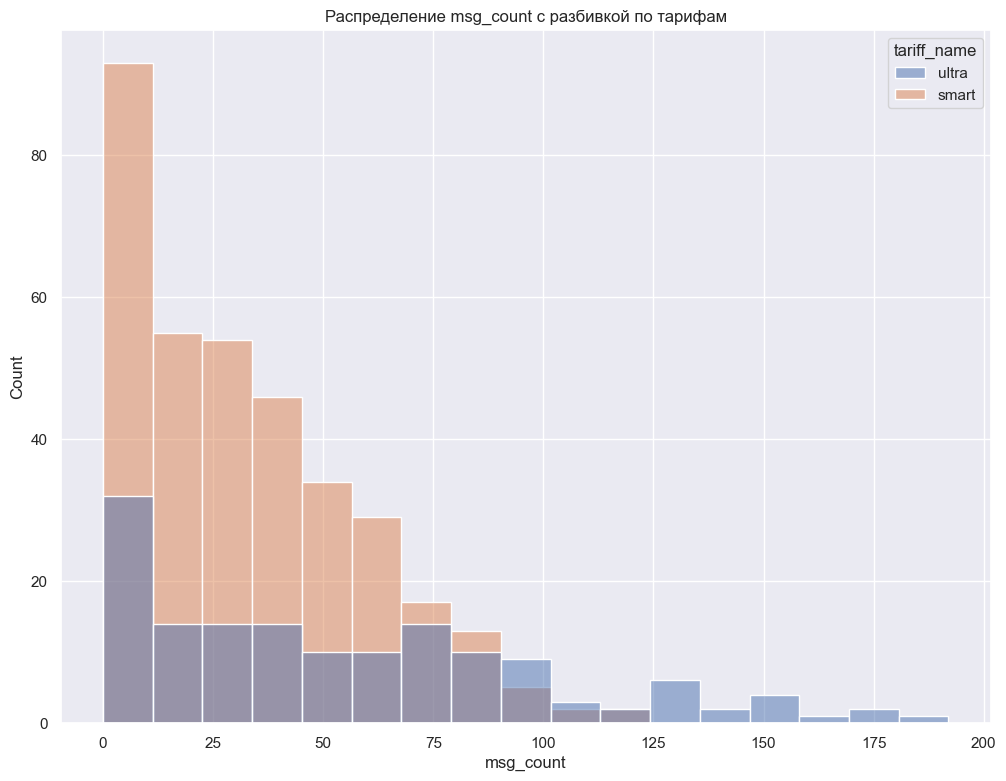

In [87]:
tariff_description('msg_count')

<b>По количеству отправляемых сообщений:</b>
- Сообщения не пользуются такой популярностью как звонки и интернет - количество тех, кто их вообще отправляет меньше общего объема выборки. К тому же большая часть пользователей обоих тарифов даже близко не отправляет сообщения в тех объемах, что положены им в рамках тарифа.
- У обоих тарифов распределение смещено сильно влево с длинным хвостом - той небольшой частью клиентов, которым необходимо дейтсвительно большое число сообщений в месяц.

### Промежуточный вывод

- Звонки и интернет - более популярные виды услуг, чем отправка сообщений. 
- В вопросах звонков пользователи в среднем стараются укладываться в отмеренные им по тарифу объемы. 
- Интернет - узкое горлышко тарифов, особенно Смарта: пользователям не хватает положенного трафика и они готовы доплачивать за него. 
- Пользователи тарифа Ультра в большинстве своем не используют возможности своего тарифа в полной мере, однако, в среднем их ежемесячная абонентская плата все равно оказывается выше, чем у пользователей Смарта. У Смарта пользователи часто вынуждены доплачивать за тот же доп трафик, но за счет низкой стоимости базовых услуг по тарифу они все равно экономят по сравнению с Ультра-клиентами. 

[Вернуться к оглавлению](#title)

<a id="third_step"></a>

## Проверка гипотез

Итак, нам необходимо сформулировать гипотезы по двум вопросам - разница в выручке между двумя тарифами и между Москвой и регионами.

<b>Тарифы:</b> <br>
H0 - Средняя выручка от тарифа Ультра равна выручке от тарифа Смарт <br>
H1 - Средняя выручка от тарифа Ультра больше, чем от тарифа Смарт

Мы формулируем гипотезы таким образом, исходя из того, что абонентская плата в тарифе Ультра больше, чем у Смарта, поэтому можем выдвинуть одностороннюю гипотезу.

<b>Москва и регионы:</b> <br>
H0 - Средняя выручка в Москве равна средней выручке по остальным регионам РФ <br>
H1 - Средняя выручка в Москве больше, чем в среднем по остальным регионам РФ

Мы исходим из того, что в силу как более высокого уровня жизни и экономического развития, так и в силу большего развития мобильных сетей 4го поколения, москвичи потребляют больше интернет-трафика, а потому либо пользуются более дорогим тарифом, либо доплачивают.

Для тестирования гипотез использован двусторонний t-тест Стьюдента.
Пороговое значение мы выставим в 0.05, как в средне часто встречающееся в работах.

In [88]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_payment,internet_payment,msg_payment,total_revenue
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,8.0,1489,0.0,0.0,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,9.0,1489,0.0,0.0,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,400.0,0.0,950.0
3212,10.0,1489,0.0,0.0,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,1000.0,0.0,1550.0
3213,11.0,1489,0.0,0.0,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0


In [89]:
revenue.columns

Index(['month', 'user_id', 'duration', 'calls_count', 'mb_used', 'msg_count',
       'city', 'tariff_name', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'calls_payment', 'internet_payment', 'msg_payment',
       'total_revenue'],
      dtype='object')

In [90]:
def stol(stolica):
    if stolica == 'Москва':
        return 'Москва'
    else:
        return 'Другой регион'
    
revenue['Moscow'] = revenue['city'].apply(stol)

Создаем отдельный столбец для разбивки Москва/Не Москва.

In [91]:
revenue

,month,user_id,duration,calls_count,mb_used,msg_count,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_payment,internet_payment,msg_payment,total_revenue,Moscow
0,5.0,1000,159.0,22.0,3.0,22.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Другой регион
1,6.0,1000,172.0,43.0,23.0,60.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Другой регион
2,7.0,1000,340.0,47.0,14.0,75.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Другой регион
3,8.0,1000,408.0,52.0,14.0,81.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Другой регион
4,9.0,1000,466.0,58.0,15.0,57.0,Краснодар,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,Другой регион
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,8.0,1489,0.0,0.0,11.0,17.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0,Другой регион
3211,9.0,1489,0.0,0.0,17.0,32.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,400.0,0.0,950.0,Другой регион
3212,10.0,1489,0.0,0.0,20.0,21.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,1000.0,0.0,1550.0,Другой регион
3213,11.0,1489,0.0,0.0,18.0,20.0,Санкт-Петербург,smart,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0,Другой регион


[Вернуться к оглавлению](#title)

<a id="tarifs"></a>

### Разница между тарифами

In [92]:
alpha = .05 

results_tarif = st.ttest_ind(
    revenue['total_revenue'][revenue['tariff_name'] == 'smart'], 
    revenue['total_revenue'][revenue['tariff_name'] == 'ultra'],
    equal_var = False)

print('p-значение:', results_tarif.pvalue/2)

if results_tarif.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.1303156965538042e-250
Отвергаем нулевую гипотезу


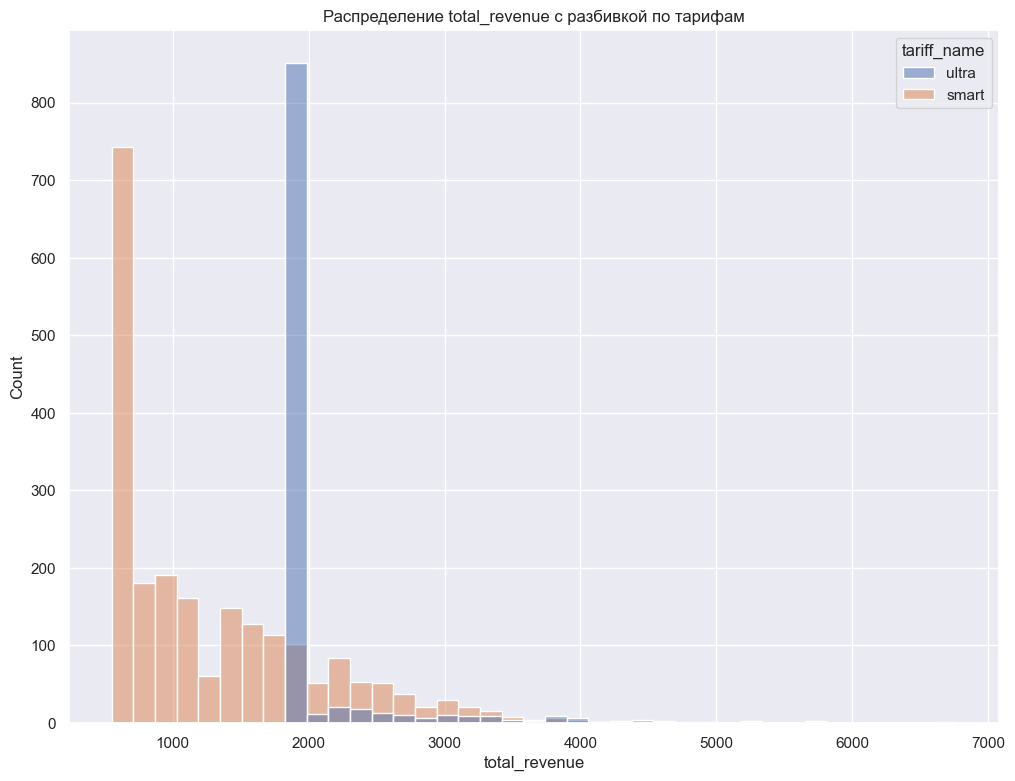

In [93]:
tariff_hist_2(revenue, 'total_revenue')

Text(0.5, 1.0, 'Сравнение средних показателей  абонетской платы за год')

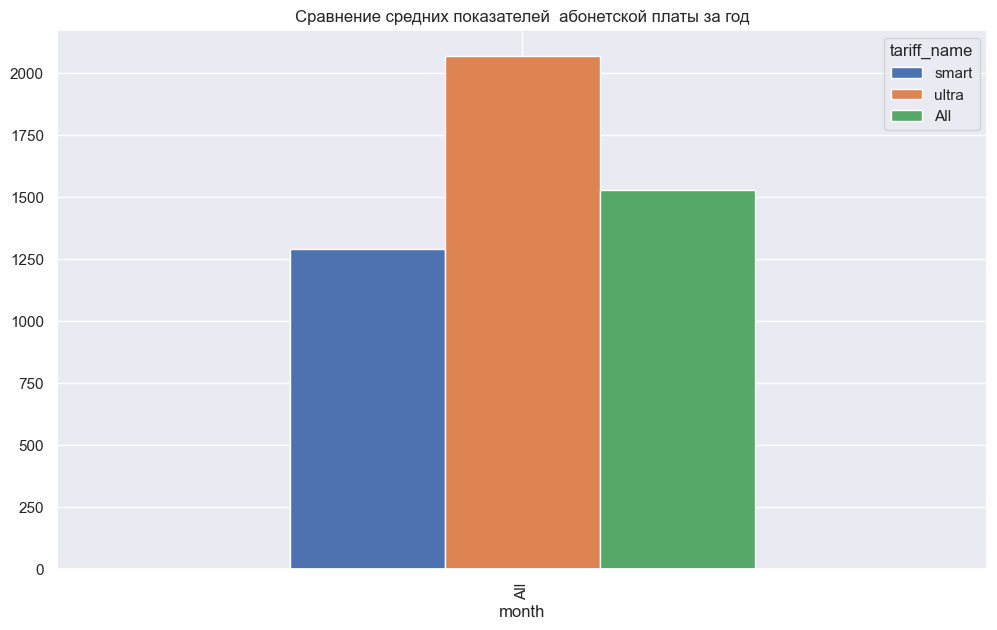

In [94]:
revenue.pivot_table(index = 'month', values = 'total_revenue', columns = 'tariff_name', aggfunc = 'mean', margins = True)[revenue.pivot_table(index = 'month', values = 'total_revenue', columns = 'tariff_name', aggfunc = 'mean', margins = True).index == 'All'].plot.bar(figsize = (12, 7)).set_title('Сравнение средних показателей  абонетской платы за год')

Сделанный еще ранее по результатам сравнения средних значений (на графике) вывод  о том, что средняя выручка от дорого тарифа Ультра выше, чем от экономного смарта подтвердился с помощью статистического теста. 

[Вернуться к оглавлению](#title)

<a id="regions"></a>

### Разница между регионами

In [95]:
alpha = .05 

results_tarif = st.ttest_ind(
    revenue['total_revenue'][revenue['Moscow'] == 'Москва'], 
    revenue['total_revenue'][revenue['Moscow'] == 'Другой регион'],
    equal_var = False)

print('p-значение:', results_tarif.pvalue/2)

if results_tarif.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2628688331864649
Не получилось отвергнуть нулевую гипотезу


Text(0.5, 1.0, 'Распределение выручки с разбивкой по регионам')

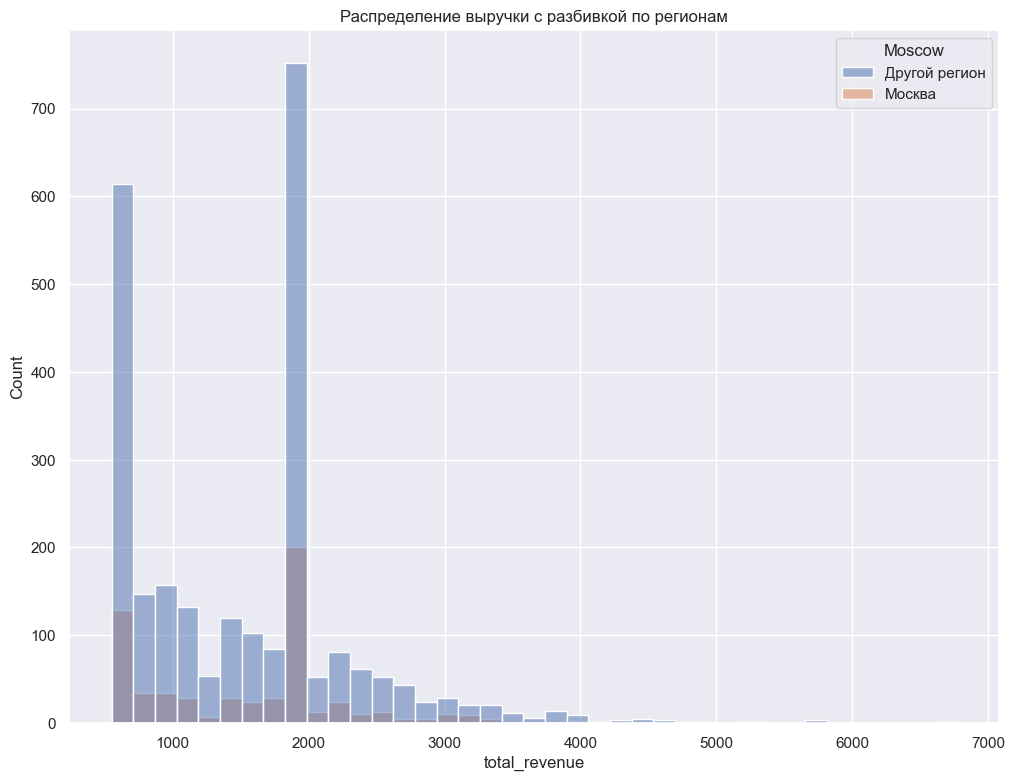

In [96]:
sns.histplot(data=revenue, 
                 x='total_revenue', 
                 hue='Moscow', 
                 stat='count', 
                 bins='auto', 
                 common_bins=True, 
                 common_norm=True,
                 multiple='layer', 
                 element='bars',
                 fill=True, 
                 shrink=1, 
                 thresh=0, 
                 pthresh=None, 
                 pmax=None, 
                 cbar=True, 
                 cbar_ax=None, 
                 cbar_kws=None, 
                 palette=None, 
                 hue_order=None, 
                 hue_norm=None, 
                 color=None,
                 legend=True, 
                 ax=None).set_title('Распределение выручки с разбивкой по регионам')

In [97]:
rev_temp_table = revenue.pivot_table(index = 'tariff_name', values = 'total_revenue', columns = 'Moscow', aggfunc = 'mean', margins = True)

rev_temp_table.style.background_gradient('coolwarm')

Moscow,Другой регион,Москва,All
tariff_name,,,
smart,1300.574607,1239.357513,1289.973531
ultra,2069.013158,2074.000000,2070.152284
All,1524.936227,1546.713584,1529.076229


Text(0.5, 1.0, 'Сравнение средних показателей  абонетской платы за год между тарифами и регионами')

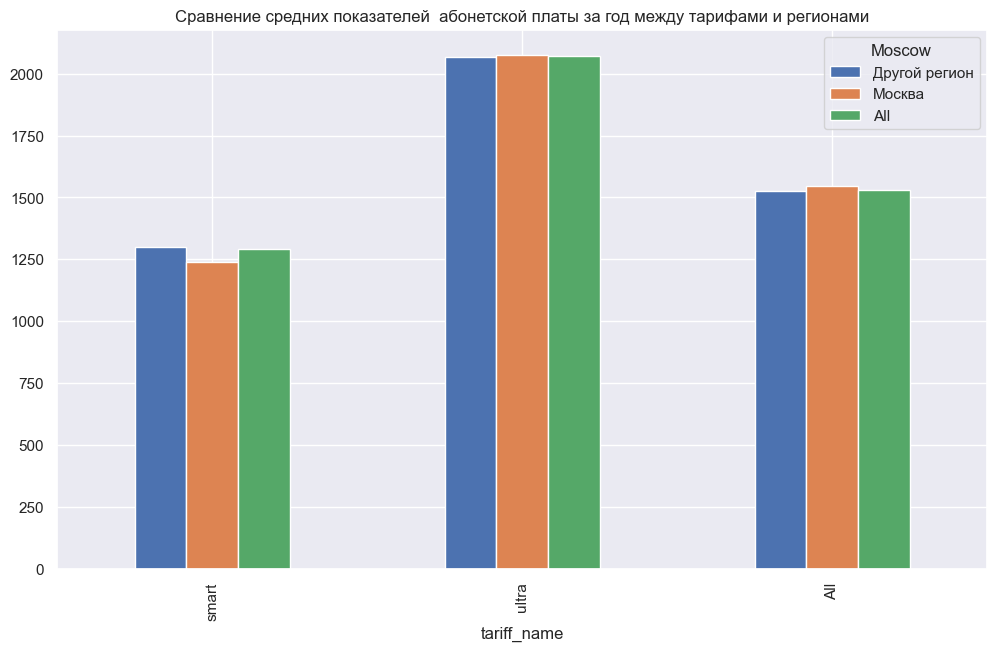

In [98]:
rev_temp_table.plot.bar(figsize = (12, 7)).set_title('Сравнение средних показателей  абонетской платы за год между тарифами и регионами')

- А вот разницу между регионами найти не удалось. Возможно она нашлась бы если бы мы сравнивали не Москву и другие регионы, а регионы с городами миллионикам и без, так как 4G давно распространился за пределами Москвы. 
- Однако, мы видим, что в значительной мере это среднее значение создается за счет Ультры, что подтверждается также и обычным сравнением средних показателей за год. Необходимо отдельно рассмотреть пользователей Смарта.

In [99]:
alpha = .05 

results_tarif = st.ttest_ind(
    revenue['total_revenue'][(revenue['Moscow'] == 'Москва') & (revenue['tariff_name'] == 'smart')], 
    revenue['total_revenue'][(revenue['Moscow'] == 'Другой регион') & (revenue['tariff_name'] == 'smart')],
    equal_var = False)

print('p-значение:', results_tarif.pvalue/2)

if results_tarif.pvalue/2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.07734171588188334
Не получилось отвергнуть нулевую гипотезу


Text(0.5, 1.0, 'Распределение с разбивкой по регионам')

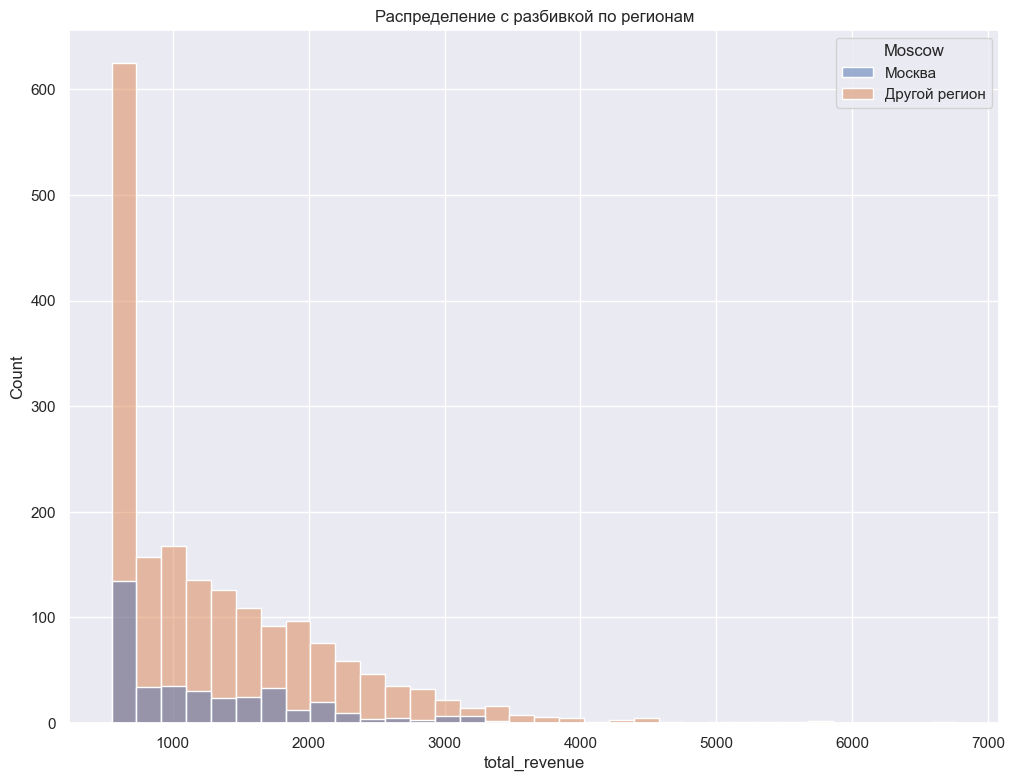

In [100]:
 sns.histplot(data=revenue[revenue['tariff_name'] == 'smart'], 
                 x='total_revenue', 
                 hue='Moscow', 
                 stat='count', 
                 bins='auto', 
                 common_bins=True, 
                 common_norm=True,
                 multiple='layer', 
                 element='bars',
                 fill=True, 
                 shrink=1, 
                 thresh=0, 
                 pthresh=None, 
                 pmax=None, 
                 cbar=True, 
                 cbar_ax=None, 
                 cbar_kws=None, 
                 palette=None, 
                 hue_order=None, 
                 hue_norm=None, 
                 color=None,
                 legend=True, 
                 ax=None).set_title("Распределение с разбивкой по регионам")

Статистически значимой разницы в Смарте между регионами также нет, но распределения уже не так похожи друг на друга, как в общем массиве по обоим тарифам. Если бы мы выставили p-value в 0,1, то разница была бы статистически значима.

[Вернуться к оглавлению](#title)

<a id="final_step"></a>

## Итоговый вывод

Итого по результатам исследования мы можем отметить следующее:
- Разница в сценариях использования между тарифами не очень велика. Пользователи дорого тарифа Ультра пользуются им не потому что им нужны огромные возможности, в него заложенные, а потому что им не хватает того, что предоставляет Смарт. То есть Ультру берут скорее "на вырост".
- Как уже было сказано, Смарта клиентам не хватает и они часто доплачивают - в основном за дополнительный интернет-трафик, так как именно он является "узким местом" в тарифе. 
- Клиенты Ультры в основном не переплачивают сверх абонентской платы, если делают это, то в основном также за интернет. 
- Несмотря на это, из-за почти 4-кратной разницы в базовой ежемесячной оплате Ультра приносит в среднем больше денег, чем Смарт. При этом разница эта статистически значимая. 
- Однако, важно отметить, что средняя абонентская плата от пользователей тарифа Смарт растет с каждым месяца, в то время как у Ультры она скорее стабильна. 
- Между регионами и столицей статистически значимая разница отсутствует. Возможно она может быть между пользователями тарифа Смарт.
- В целом Ультра является более выгодным тарифом для Мегалайна, так как он приносит значимо больше денег, при этом не вызывая какой-то сильно большей нагрузки на сети. 
- Недостаточный объем интернет-трафика в тарифах - главная причина переплаты со стороны клиентов, с одной стороны это выгодно для оператора - может быть клиенты даже решат перейти на тариф Ультра. С другой, может быть клиенты решат вообще уйти к другому оператору. Однако, на данный вопрос в рамках этого исследования мы ответить не можем.
- Также было выявлено два клиента, то есть 0,4% от выборки, которые отказали от услуг спустя несколько дней после регистрации, при этом услугами они не пользовались. Один был пользователем тарифа Смарт, другой - Ультра. 

[Вернуться к оглавлению](#title)